<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/catafest_066.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.*  
[en.wikipedia - LangChain](https://en.wikipedia.org/wiki/LangChain)

In [17]:
pip install langchain langchain-experimental

PromptTemplate: This class might be used to create structured prompts for language models.

BaseModel & Field: These are from the pydantic library, which is used for data validation and settings management using Python type annotations.

OllamaFunctions: Likely a part of the langchain_experimental package, possibly providing experimental functions related to large language models (LLMs).

In [18]:
!pip install numpy matplotlib scipy pydantic



In [19]:
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel, Field
from langchain_experimental.llms.ollama_functions import OllamaFunctions

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull

The function generate_3D_object(num_points: int) generates random 3D points.

It returns a set of points in 3D space, representing the vertices of the object.

The function generate_lattice_model(points_3D) calculates and visualizes the convex hull (or lattice) of the 3D points , known as the smallest convex shape that encloses all the points.

NOTE: *Maybe I can use a similar code to use with Blender 3D. *


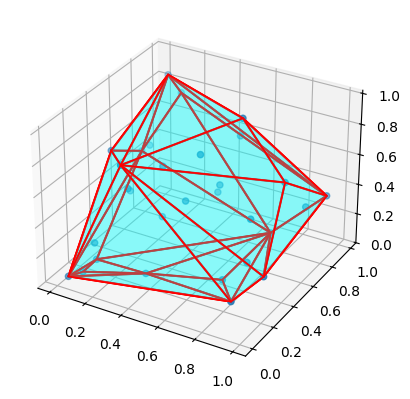

In [21]:
# Generate a 3D object from vertices
def generate_3D_object(num_points: int):
    x = np.random.rand(num_points)
    y = np.random.rand(num_points)
    z = np.random.rand(num_points)
    return np.vstack((x, y, z)).T

# Function to calculate and visualize the lattice (convex hull)
def generate_lattice_model(points_3D):
    hull = ConvexHull(points_3D)

    # Plotting the points and the lattice model
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotting the points
    ax.scatter(points_3D[:, 0], points_3D[:, 1], points_3D[:, 2], marker='o')

    # Plotting the lattice
    for simplex in hull.simplices:
        simplex = np.append(simplex, simplex[0])  # Close the loop
        ax.plot(points_3D[simplex, 0], points_3D[simplex, 1], points_3D[simplex, 2], 'r-')

    # Adding faces to the lattice
    ax.add_collection3d(Poly3DCollection(points_3D[hull.simplices], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

    plt.show()

# Defining a data model for the 3D sphere using pydantic
class Sphere3DModel(BaseModel):
    num_points: int = Field(..., description="Number of points to generate on the sphere")

# Function to generate the image of the 3D sphere
def generate_sphere3D_image(sphere_model: Sphere3DModel) -> str:
    points = generate_3D_object(sphere_model.num_points)
    ollama = OllamaFunctions()

    # Generate prompt for image
    prompt_str = f"Generate a 3D plot of a sphere with {sphere_model.num_points} points."
    image = ollama.generate_image(prompt_str, points)
    return image

# Example usage
if __name__ == "__main__":
    num_points = 30
    points_3D = generate_3D_object(num_points)
    generate_lattice_model(points_3D)